<a href="https://colab.research.google.com/github/BALAVIDULA/Human_Activity_Recog/blob/main/Human_Activity_Recog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Load The train dataset

In [4]:
df_train=pd.read_csv('/content/drive/MyDrive/projects/human_activity_recog/Dataset/train.csv')

In [5]:
df_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


Dataset Info

In [6]:
df_train.shape

(7352, 563)

In [7]:
df_train.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [8]:
df_train.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


In [9]:
df_train['Activity'].unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

Visualizing the classes

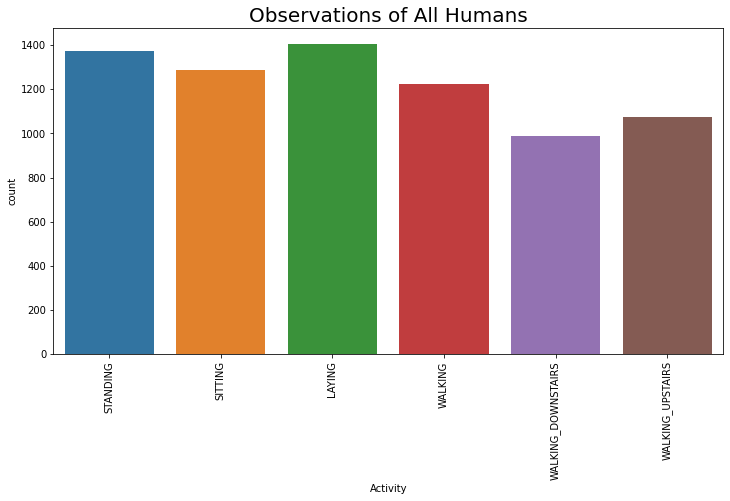

In [10]:
plt.figure(figsize=(12,6))
plt.title('Observations of All Humans', fontsize=20)
axis=sns.countplot(x="Activity",data=df_train)
plt.xticks(x=df_train['Activity'],rotation='vertical')
plt.show()

[]

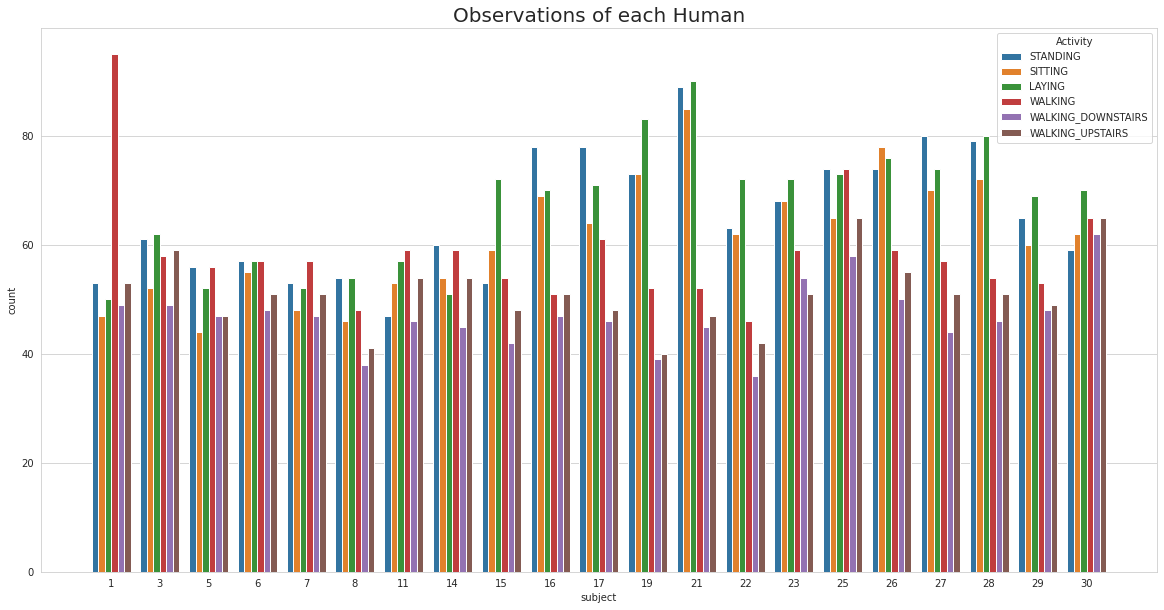

In [11]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,10))
plt.title('Observations of each Human', fontsize=20)
sns.countplot(x='subject', hue='Activity', data=df_train)
plt.plot()

Training the model

In [12]:
df_train['subject'].unique()

array([ 1,  3,  5,  6,  7,  8, 11, 14, 15, 16, 17, 19, 21, 22, 23, 25, 26,
       27, 28, 29, 30])

In [13]:
X=pd.DataFrame(df_train.drop(['Activity','subject'],axis=1))
y=df_train.Activity.values.astype(object)

In [14]:
X.shape , y.shape

((7352, 561), (7352,))

Data Preprocessing

In [15]:
encoder=preprocessing.LabelEncoder()

In [16]:
encoder.fit(y)
y=encoder.transform(y)
y.shape

(7352,)

In [17]:
encoder.classes_

array(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

Feature Scaling

In [18]:
scaler=StandardScaler()
X=scaler.fit_transform(X)

Training and Validation

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=100)

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5881, 561), (1471, 561), (5881,), (1471,))

Training MODEL

                                                                                        Support Vector Classifier - SVC

In [22]:
svc=SVC()
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9748


                                                                                              Random Forest Classifier

In [23]:
rand_clf=RandomForestClassifier(random_state=5)
rand_clf.fit(X_train,y_train)
rand_clf.score(X_test,y_test)

0.981645139360979

                                                                                                   ACCURACY METRICES

Confusion Matrix

In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[289,   0,   0,   0,   2,   0],
       [  1, 230,  14,   0,   0,   1],
       [  0,  18, 263,   0,   0,   0],
       [  0,   0,   0, 242,   1,   0],
       [  0,   0,   0,   0, 207,   0],
       [  0,   0,   0,   0,   0, 203]])

Accuracy

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9748470428280082

Recall

In [26]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average=None)

array([0.99312715, 0.93495935, 0.93594306, 0.99588477, 1.        ,
       1.        ])

Precision

In [27]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average=None)

array([0.99655172, 0.92741935, 0.94945848, 1.        , 0.98571429,
       0.99509804])

F1 Score

In [28]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average=None)

array([0.99483649, 0.93117409, 0.94265233, 0.99793814, 0.99280576,
       0.997543  ])

In [29]:
import pickle
filename = 'activity_recog.pkl'
pickle.dump(y_pred,open(filename, 'wb'))